In [254]:
#Importing the Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings,scipy
warnings.filterwarnings("ignore")
###
import scipy.stats as stats
from scipy.special import boxcox1p, boxcox
import scipy.stats as stats 
import statsmodels.api as sm

# Data Sourcing and check

In [255]:
loan_df = pd.read_csv("loan.csv")
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Understanding

In [256]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [257]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning

In [258]:
#Dropping the columns which has all the NULL value across the given dataset
loan_df.dropna(how='all', axis=1,inplace=True)

In [259]:
#Removing Duplicates if any
loan_df.drop_duplicates(inplace= True)

In [260]:
#Find out the % of 0 or NULL values across all other columns:
def missing_zero_values_percentage(df):
    zero_val_percent = round(((100* (df == 0.00).astype(int).sum(axis=0))/len(df)),2)
    mis_val_percent = round((100 * df.isnull().sum() / len(df)),2)
    missing_value_percent_table = pd.concat([zero_val_percent,mis_val_percent], axis=1)
    missing_value_percent_table = missing_value_percent_table.rename(
        columns = {0 : '% of Zero Values', 1 : '% of NULL Values'})
    missing_value_percent_table['Total % of Missing Values'] = missing_value_percent_table['% of Zero Values'] + missing_value_percent_table['% of NULL Values']
    return missing_value_percent_table.sort_values(by='Total % of Missing Values', ascending=False)

In [261]:
missing_parcentage = missing_zero_values_percentage(loan_df)

In [262]:
#Removing those Columns from the dataframe which are either NULL or having 0 for all the records 
drop_list = missing_parcentage[missing_parcentage['Total % of Missing Values']==100].index
loan_df.drop(labels=drop_list, axis=1,inplace=True)

In [263]:
#Removing those Columns from the dataframe which are having more than 90% NULL values 
drop_list = missing_parcentage[missing_parcentage['% of NULL Values']>90].index
loan_df.drop(labels=drop_list, axis=1,inplace=True)

In [264]:
#Removing those columns which contains one value for the entire dataset
drop_list=[]
for cols in loan_df.columns:
    if (loan_df[cols].unique().size == 1) & (loan_df[cols].isna().sum()==0):
        drop_list.append(cols)
loan_df.drop(labels=drop_list, axis=1,inplace=True)

In [265]:
#Removing those columns which contains all different values for the entire dataset
drop_list=[]
for cols in loan_df.columns:
    if (loan_df[cols].unique().size == len(loan_df)) & (loan_df[cols].isna().sum()==0):
        drop_list.append(cols)
loan_df.drop(labels=drop_list, axis=1,inplace=True)

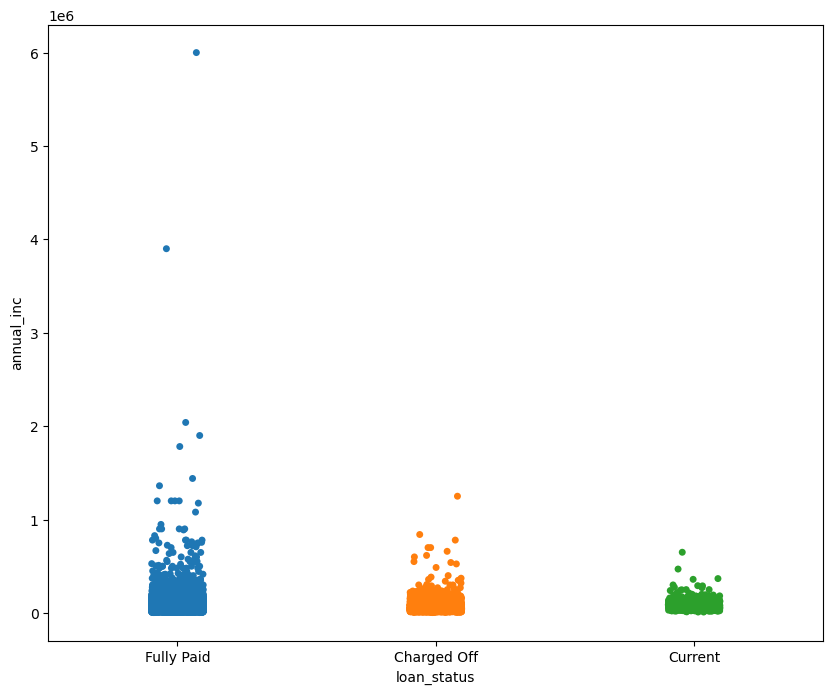

In [266]:
#Finding Outliers
plt.figure(figsize=[10,8])
sns.stripplot(x="loan_status",y="annual_inc",data=loan_df)
plt.show()

In [267]:
#Calculating Quartiles to decide the accpected range
Q1_Y = loan_df['annual_inc'].quantile(0.25)
Q3_Y = loan_df['annual_inc'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

In [268]:
#Excluding the Outliers for annual_inc
loan_df = loan_df[~np.logical_or(loan_df['annual_inc']< (Q1_Y-1.5*IQR_Y),loan_df['annual_inc']> (Q3_Y+1.5*IQR_Y))]

In [269]:
#Remove "months" from the column "term"
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.split()[0]))

In [270]:
loan_df.shape

(37874, 43)

In [273]:
#Remove "%" Sign from the column "int_rate"
#loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x[:-1]))
loan_df['int_rate'] = loan_df['int_rate'].replace('%','0')

In [274]:
loan_df.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '7.49%', '11.99%', '5.99%',
       '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%', '16.49%',
       '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '17.49%', '10.59%',
       '15.62%', '21.36%', '19.29%', '13.99%', '18.39%', '16.89%',
       '20.62%', '17.99%', '19.69%', '20.25%', '20.99%', '22.85%',
       '23.22%', '21.74%', '22.48%', '22.11%', '23.59%', '18.07%',
       '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%', '19.39%',
       '16.11%', '17.54%', '22.64%', '13.84%', '12.62%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '18.49%',
       '22.94%', '

In [236]:
#Standarized the column "emp_length"
loan_df['emp_length'] = loan_df['emp_length'].fillna('0 years')
loan_df['emp_length'] = loan_df['emp_length'].replace(['< 1 year','10+ years'],['1 year','10 years'])
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: int(x.split()[0]))

In [ ]:
#Remove "%" Sign from the column "revol_util"
loan_df['revol_util'] = loan_df['revol_util'].fillna('0%')
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: float(x[:-1]))

In [ ]:
#issue_d has data in MON-YY format (DEC-11,JAN-10 etc),converting it to date format by considering the 1st Day of the corresponding month. 
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: pd.to_datetime('01-'+x))

In [ ]:
#Checking loan_status wise record division in the dataset 
loan_df.groupby(['loan_status']).size()

# Data Analysis

In [278]:
#Considering only the "Charged Off" and "Fully Paid" for our analysis
df = loan_df[~(loan_df['loan_status'] == 'Current')]
print(df.loan_status.unique()) 
print(df.shape)

['Fully Paid' 'Charged Off']
(36817, 43)


In [175]:
### Dropping the out_prncp and out_prncp_inv columns as those are not available for paid off and charged loans 
df.drop(columns=['out_prncp','out_prncp_inv'], axis =1, inplace=True)

In [189]:
### To be dropped 
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


### Correlation Analysis

In [180]:
corr=df.corr()
corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.982006,0.936959,0.349969,0.931600,0.403676,0.089215,-0.037144,0.002438,0.022047,0.167085,-0.044709,0.311997,0.239834,0.877153,0.842025,0.839378,0.726750,0.043233,0.144803,0.075363,0.469104,-0.030199
funded_amnt,0.982006,1.000000,0.954904,0.329057,0.957203,0.399622,0.088300,-0.036658,0.003053,0.021875,0.165046,-0.045364,0.304014,0.234624,0.893747,0.858652,0.857098,0.735291,0.045726,0.146835,0.077581,0.473613,-0.031174
funded_amnt_inv,0.936959,0.954904,1.000000,0.348549,0.902855,0.382810,0.096150,-0.043062,-0.012071,0.078790,0.152508,-0.046818,0.284623,0.227214,0.869258,0.904653,0.831374,0.724364,0.025452,0.134167,0.062977,0.465402,-0.035799
term,0.349969,0.329057,0.348549,1.000000,0.092192,0.079665,0.079056,0.006216,0.046030,0.036806,0.044050,0.012655,0.072228,0.092920,0.306127,0.322121,0.199787,0.508712,0.013841,0.113936,0.038285,0.269174,0.016285
installment,0.931600,0.957203,0.902855,0.092192,1.000000,0.398816,0.078030,-0.025057,0.001513,0.007513,0.161652,-0.040704,0.304355,0.213038,0.853975,0.811706,0.841677,0.640720,0.053425,0.123525,0.075396,0.407754,-0.027497
annual_inc,0.403676,0.399622,0.382810,0.079665,0.398816,1.000000,-0.075098,0.031066,0.030305,-0.003796,0.264601,-0.010494,0.398748,0.386105,0.383395,0.369112,0.384197,0.273674,0.004251,0.040162,0.020372,0.219663,-0.007345
dti,0.089215,0.088300,0.096150,0.079056,0.078030,-0.075098,1.000000,-0.031628,0.007538,0.067919,0.298256,-0.006611,0.269576,0.245460,0.085051,0.091255,0.062767,0.121252,-0.011207,0.027555,0.011588,0.023768,0.004314
delinq_2yrs,-0.037144,-0.036658,-0.043062,0.006216,-0.025057,0.031066,-0.031628,1.000000,0.008743,-0.566762,0.014349,0.007834,-0.060158,0.067299,-0.028485,-0.035149,-0.043232,0.018647,0.030344,0.010840,0.011668,-0.014779,0.003958
inq_last_6mths,0.002438,0.003053,-0.012071,0.046030,0.001513,0.030305,0.007538,0.008743,1.000000,-0.004635,0.091490,0.026685,-0.026463,0.108332,-0.018752,-0.028777,-0.032236,0.020499,0.032400,0.016672,0.010083,0.021179,0.017269
mths_since_last_delinq,0.022047,0.021875,0.078790,0.036806,0.007513,-0.003796,0.067919,-0.566762,-0.004635,1.000000,0.026400,0.058268,0.026902,0.013386,0.017964,0.065188,0.020816,0.007439,-0.029045,-0.004305,-0.014780,0.011778,0.024117


In [181]:
index=[]
column=[]
value=[]
for i in range(len(corr.index)):
   for j in range(len(corr.index)):
       #if corr.iloc[i,j] > 0.75  and corr.iloc[i,j] != 1:
        if corr.iloc[i,j] !=1:
           column.append(corr.columns[i])
           index.append(corr.index[j])
           value.append((corr.iloc[i,j]))

correlation=pd.DataFrame({'columns':column,'index':index,'value':value})
correlation.sort_values(by='value',ascending=False)
correlation

,columns,index,value
0,loan_amnt,funded_amnt,0.982006
1,loan_amnt,funded_amnt_inv,0.936959
2,loan_amnt,term,0.349969
3,loan_amnt,installment,0.931600
4,loan_amnt,annual_inc,0.403676
5,loan_amnt,dti,0.089215
6,loan_amnt,delinq_2yrs,-0.037144
7,loan_amnt,inq_last_6mths,0.002438
8,loan_amnt,mths_since_last_delinq,0.022047
9,loan_amnt,open_acc,0.167085


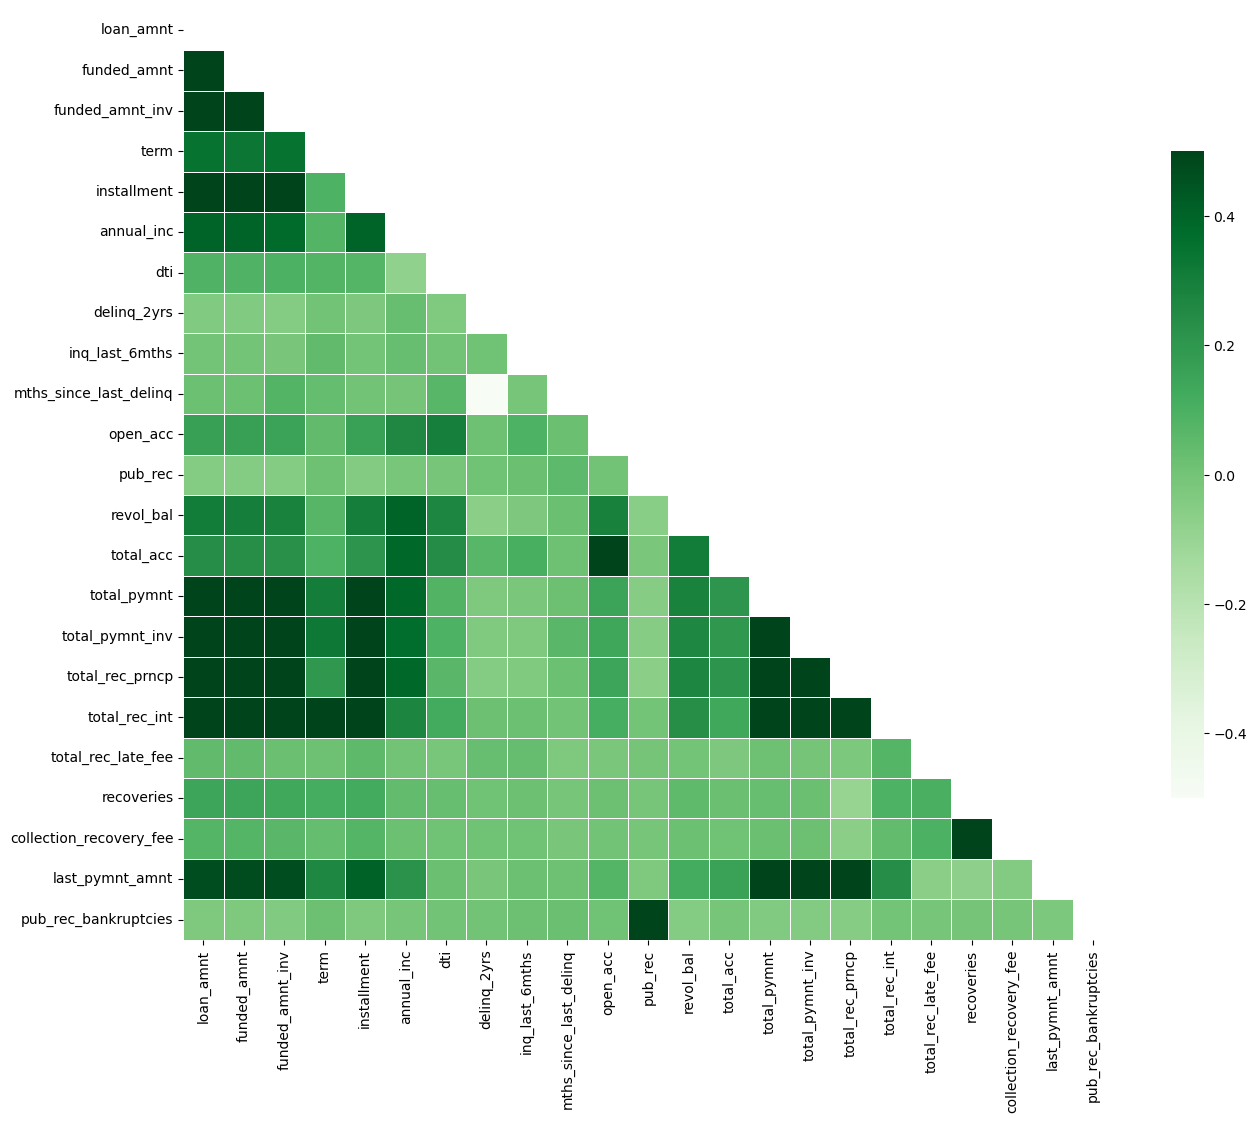

In [186]:
#Corrrelation Plot 
### To be dropped
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

def relation_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "Greens", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

relation_heatmap(df, 'Loan Correlation')

In [188]:
### 
plt.figure(figsize=[17,14])
sns.heatmap(df,cmap="Greens", annot=True)
plt.show()

ValueError: could not convert string to float: '10.65%'

<Figure size 1700x1400 with 0 Axes>

### Data Distribution Check

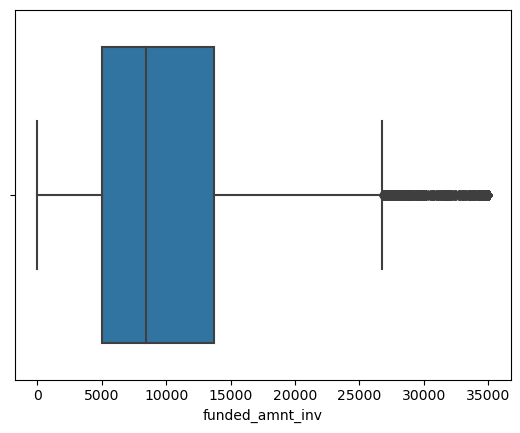

funded_amnt_inv


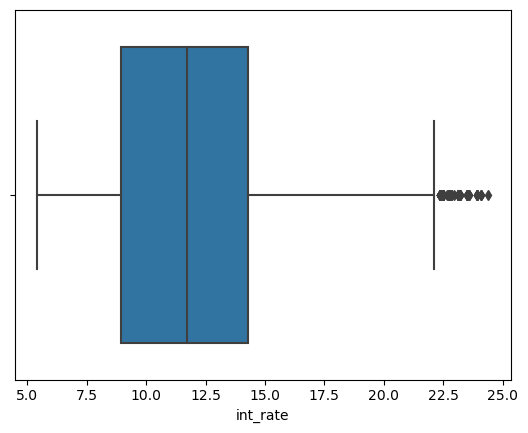

int_rate


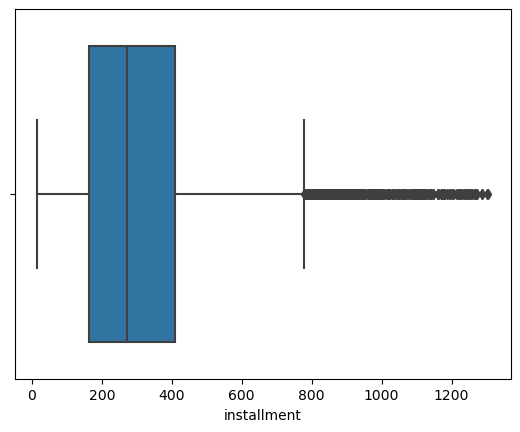

installment


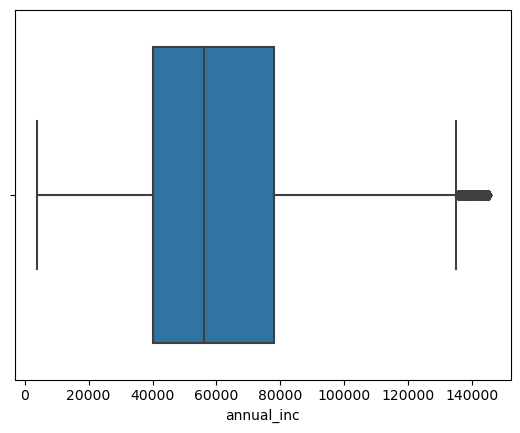

annual_inc


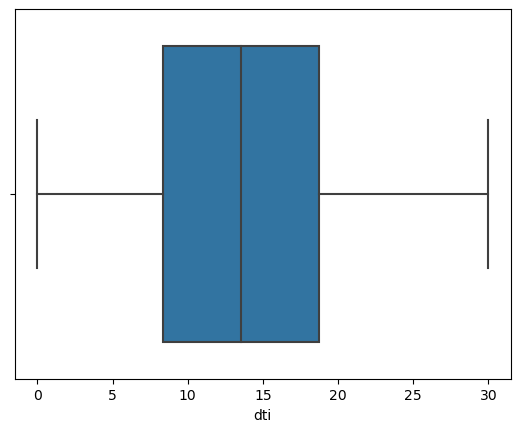

dti


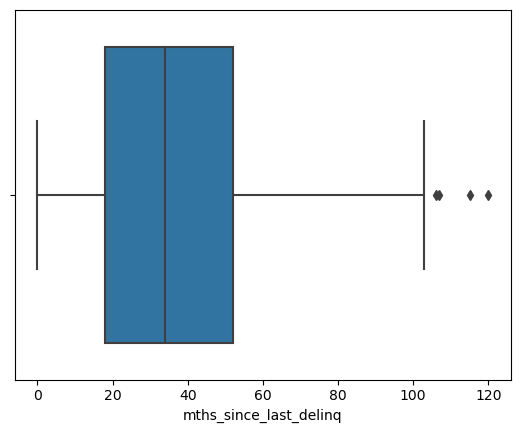

mths_since_last_delinq


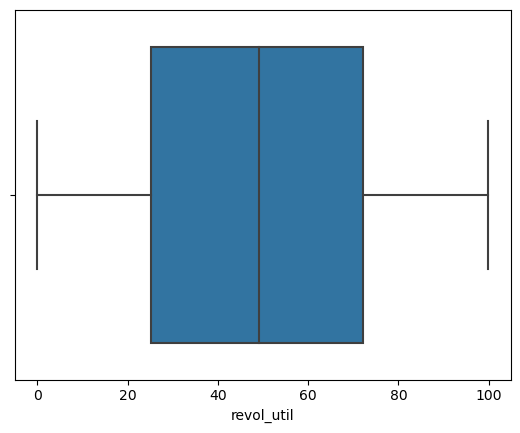

revol_util


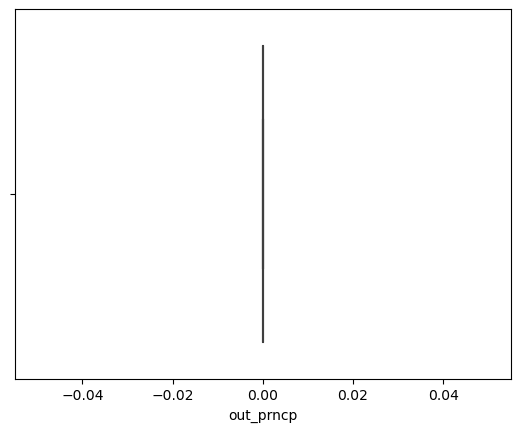

out_prncp


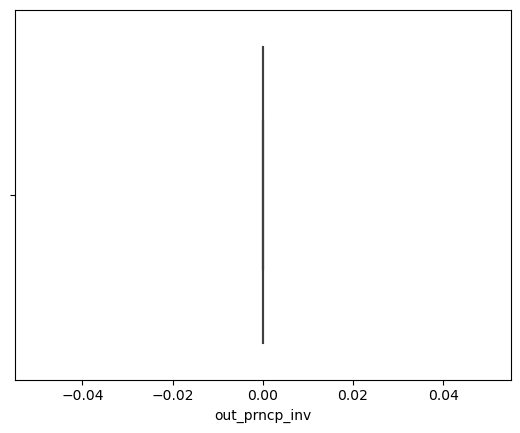

out_prncp_inv


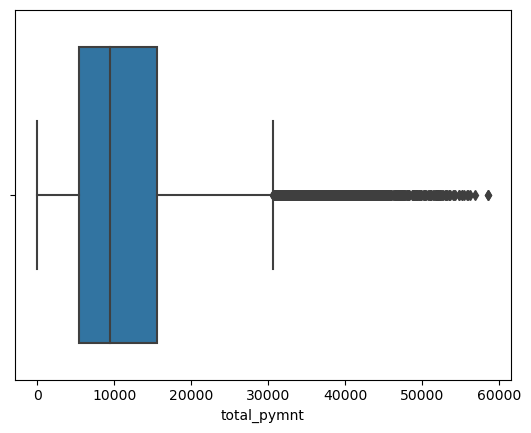

total_pymnt


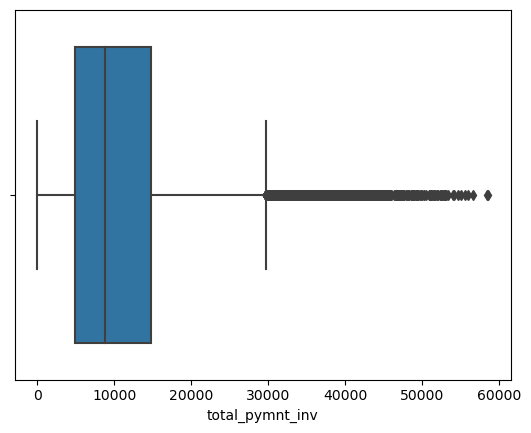

total_pymnt_inv


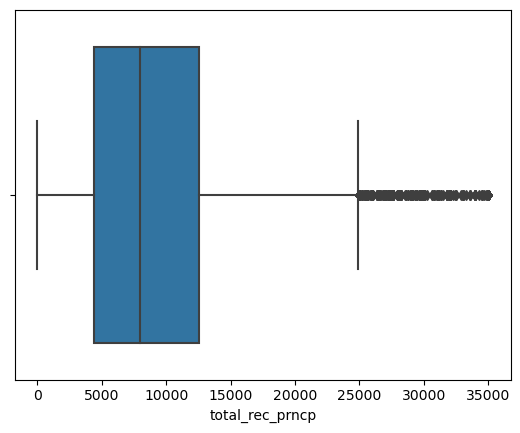

total_rec_prncp


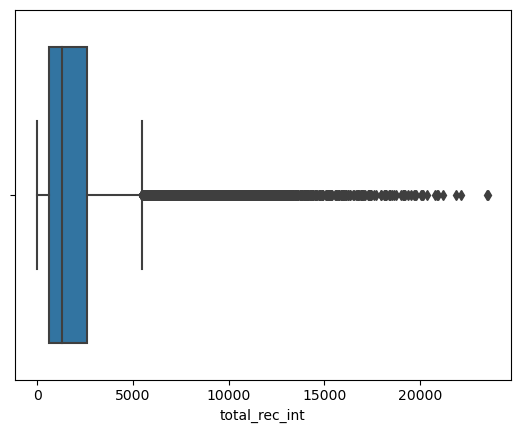

total_rec_int


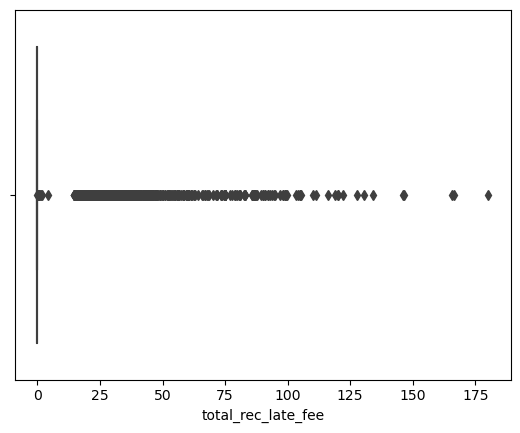

total_rec_late_fee


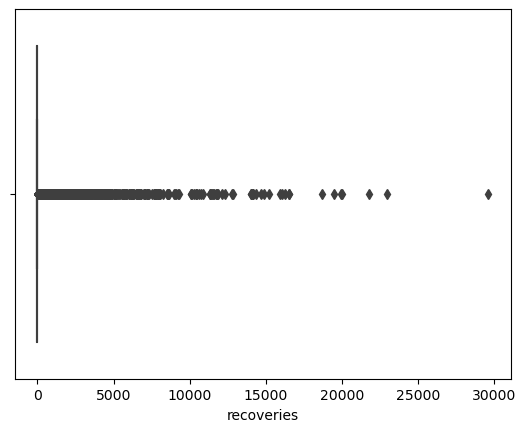

recoveries


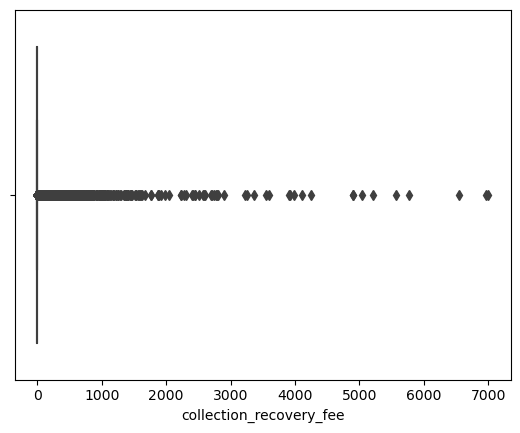

collection_recovery_fee


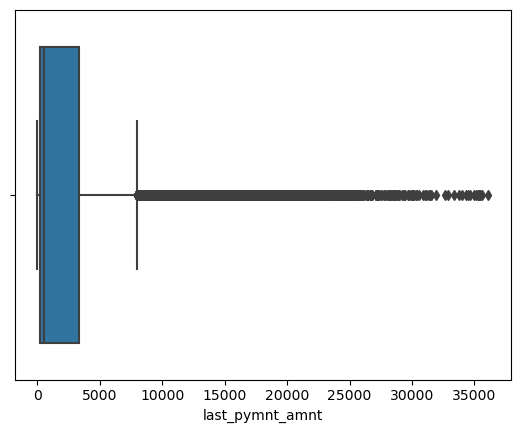

last_pymnt_amnt


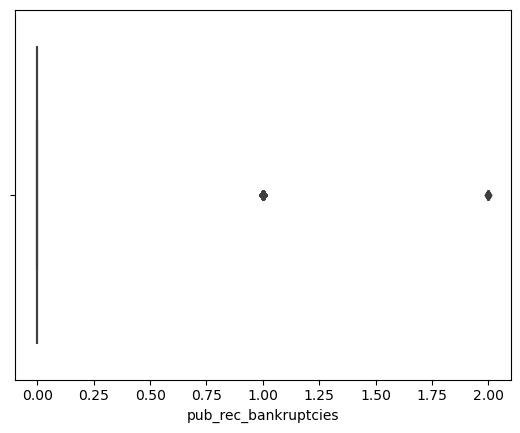

pub_rec_bankruptcies


In [138]:
float=[]
for i in df.columns:
    if df[i].dtype=='float64':
        sns.boxplot(df[pd.notna(df[i])][i])
        plt.show()
        print(i)   

### Data Skewness Check with distplot

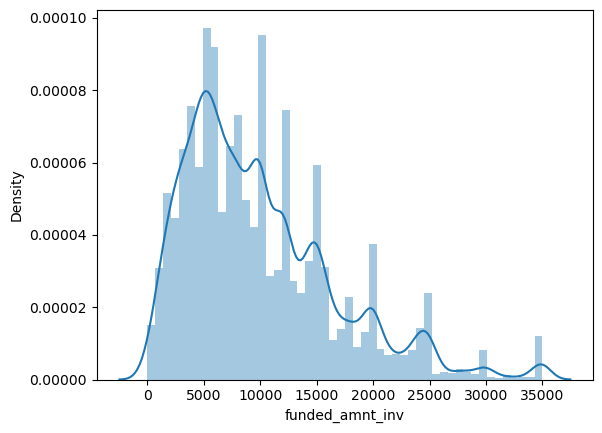

funded_amnt_inv


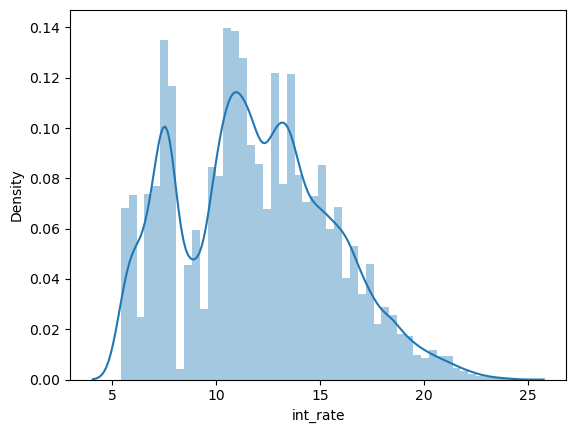

int_rate


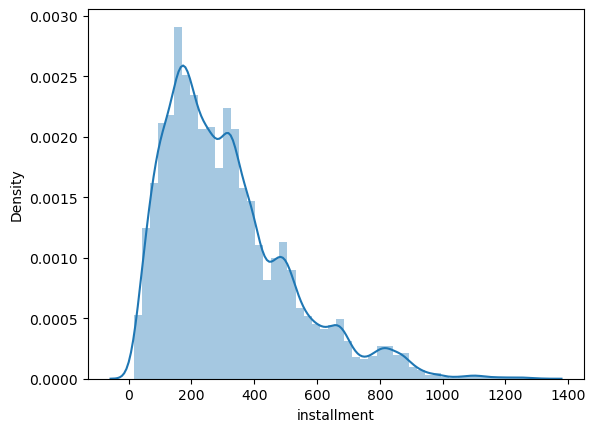

installment


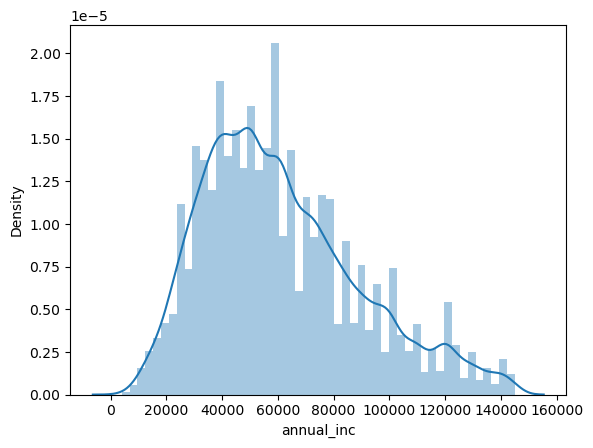

annual_inc


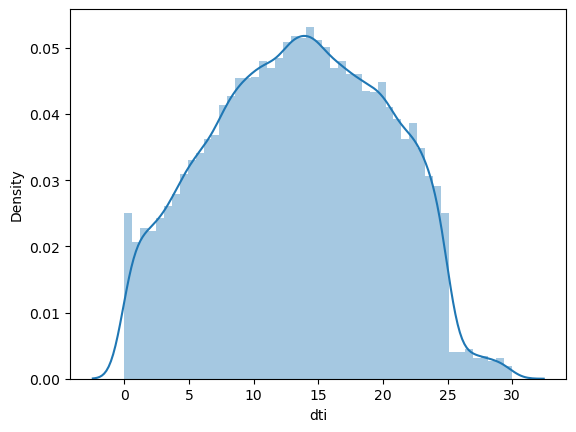

dti


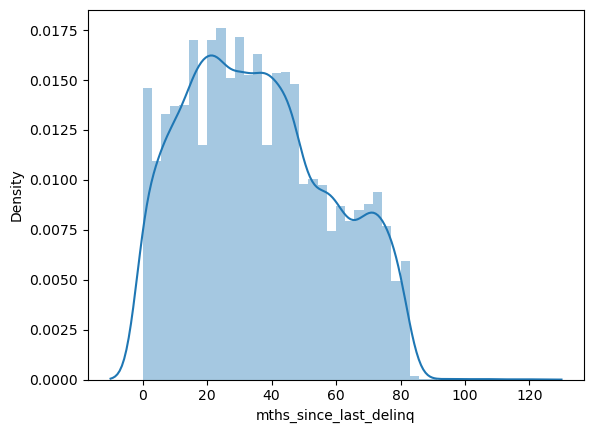

mths_since_last_delinq


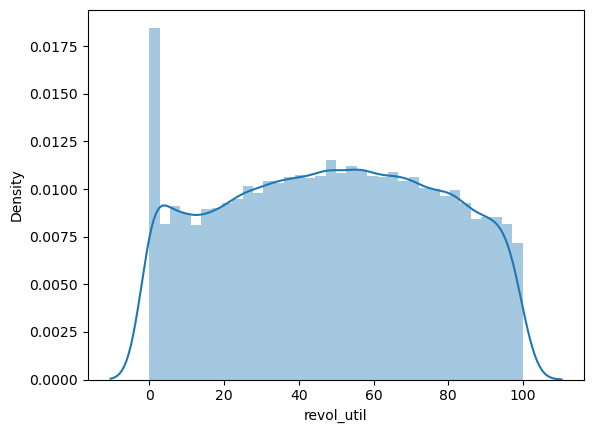

revol_util


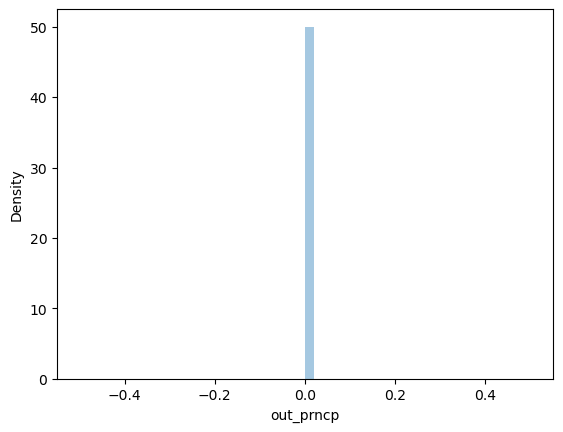

out_prncp


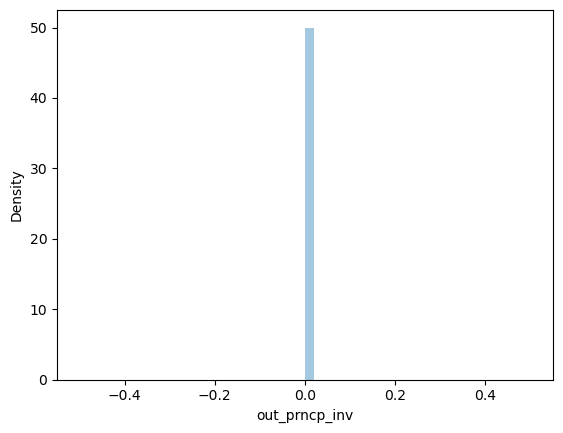

out_prncp_inv


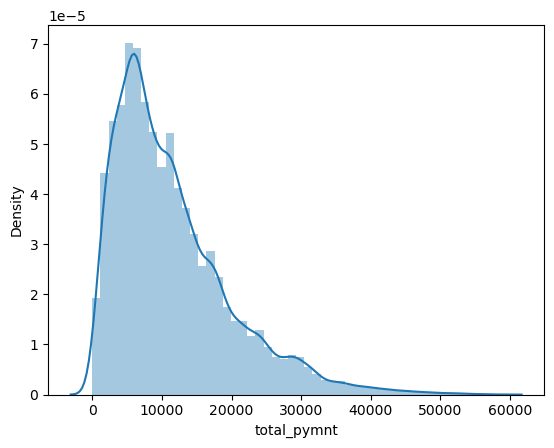

total_pymnt


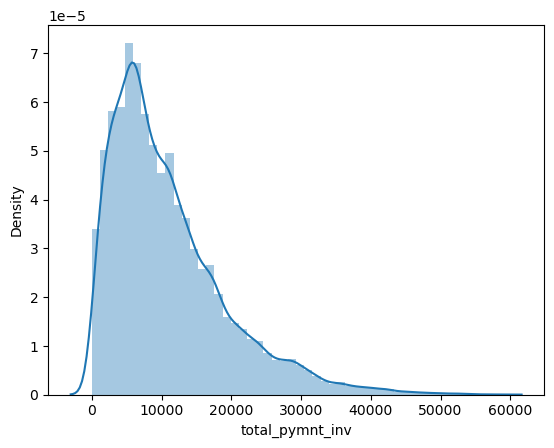

total_pymnt_inv


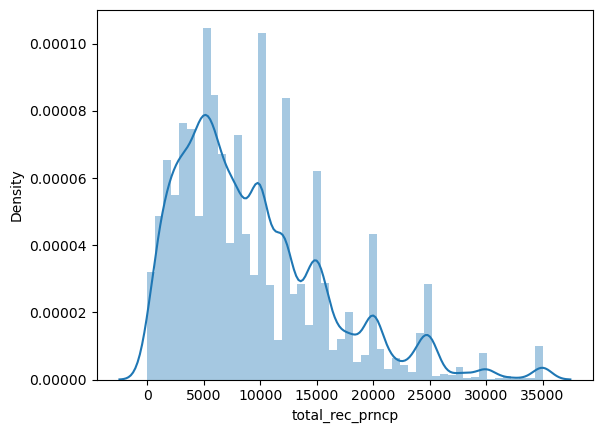

total_rec_prncp


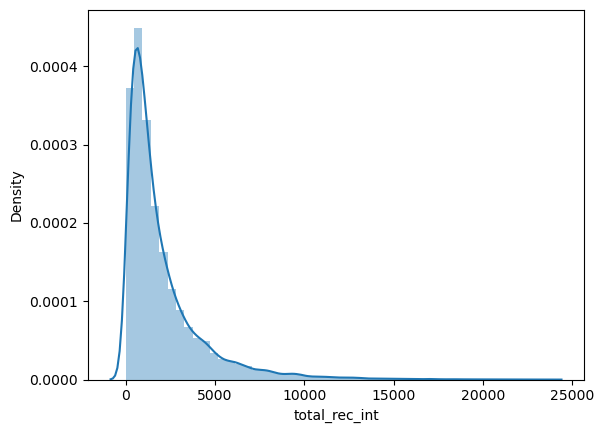

total_rec_int


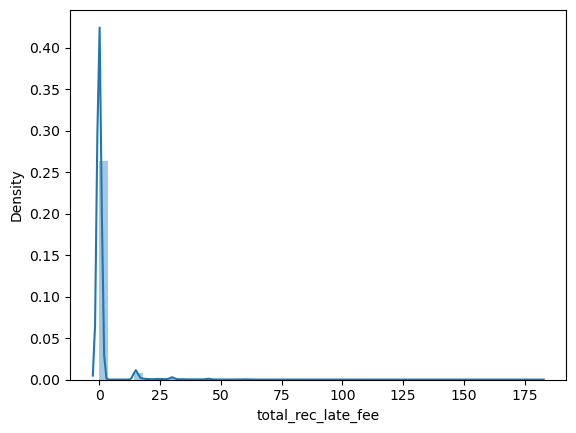

total_rec_late_fee


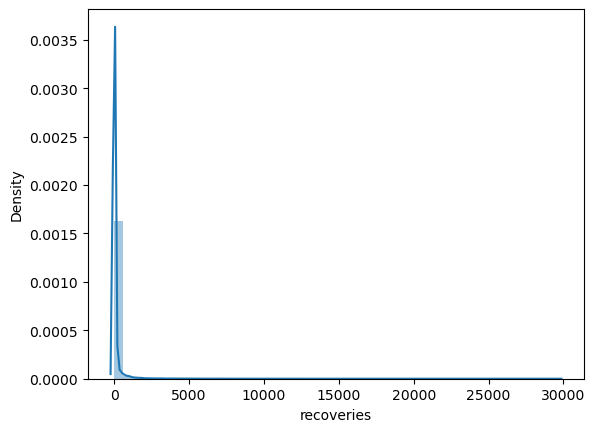

recoveries


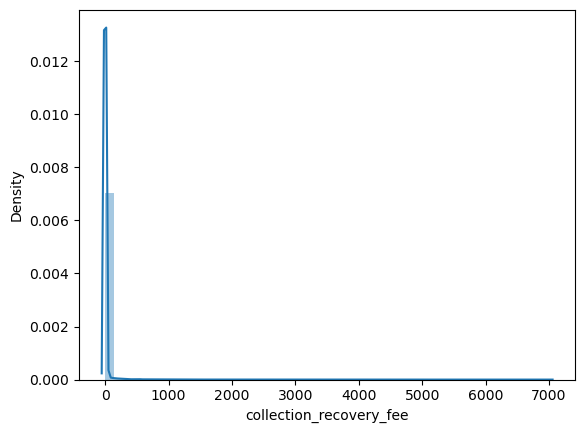

collection_recovery_fee


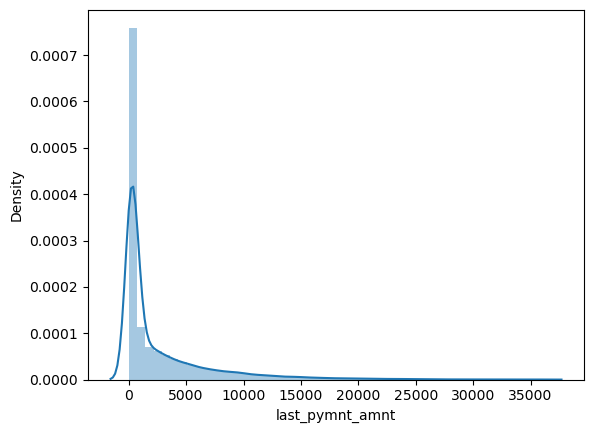

last_pymnt_amnt


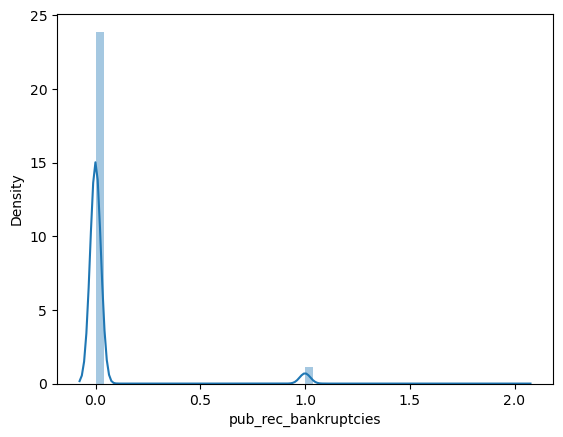

pub_rec_bankruptcies


In [140]:
 for i in df.columns:
    if df[i].dtype=='float64':
        sns.distplot(df[pd.notna(df[i])][i])
        plt.show()
        print(i)        

### Investigate Each Variable

In [141]:
def plot_var_all(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde Kernel Distribution plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()


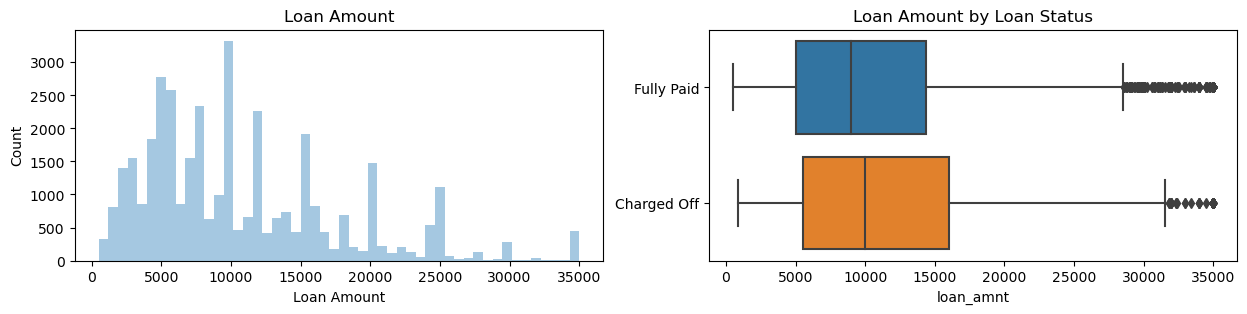

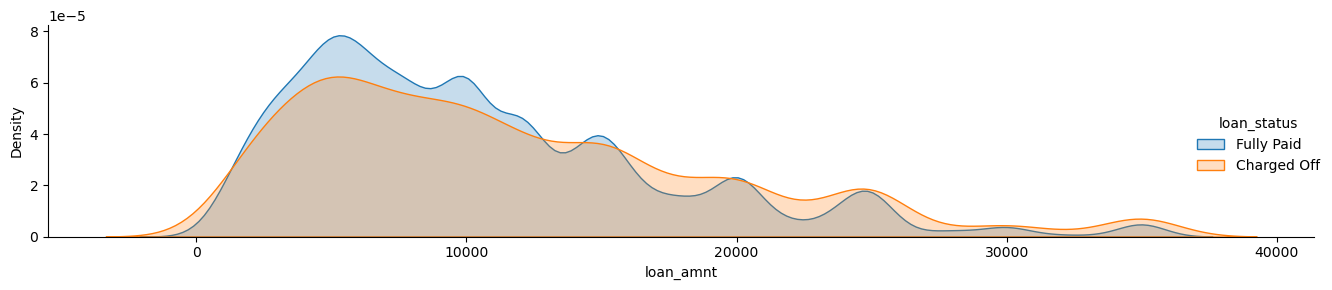

In [143]:
plot_var_all('loan_amnt', 'Loan Amount', continuous=True)

## Derived column based on DTI

In [281]:
df.groupby(['loan_status'], ).mean()['dti']

loan_status
Charged Off    14.102541
Fully Paid     13.322512
Name: dti, dtype: float64

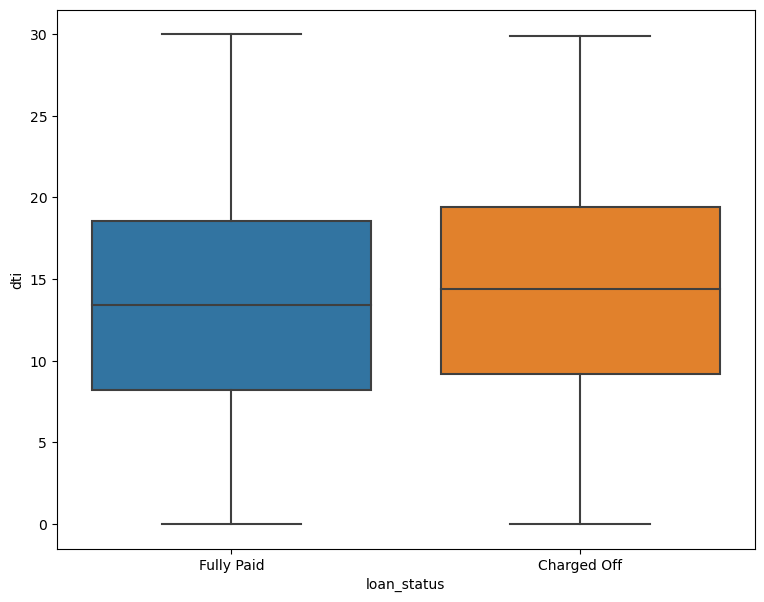

In [292]:
plt.figure(figsize=[9,7])
sns.boxplot(df['loan_status'],df['dti'])
plt.show()

In [303]:
df['dti_ind']=df['dti'].apply(lambda x:  'HIGH' if x>12 else 'LOW')

In [299]:
df[['loan_status','dti','dti_ind']].head()

,loan_status,dti,dti_ind
0,Fully Paid,27.65,HIGH
1,Charged Off,1.00,LOW
2,Fully Paid,8.72,LOW
3,Fully Paid,20.00,HIGH
5,Fully Paid,11.20,LOW


In [304]:
df.groupby(['loan_status', 'dti_ind'] ).size()

loan_status  dti_ind
Charged Off  HIGH        3405
             LOW         2026
Fully Paid   HIGH       17923
             LOW        13463
dtype: int64

### 1. Loan_status vs DTI Indicator
#### Conclution: The customer with Higher DTI  tend to Default more

In [308]:
#df.groupby(['loan_status', 'verification_status', 'dti_ind'] ).size()/df.groupby(['loan_status']).size()

round((df.groupby(['loan_status', 'home_ownership', 'dti_ind'] ).size()/df.groupby(['loan_status']).size())*100,2)

### To be done : change home_ownership NONE to OTHER 


loan_status  home_ownership  dti_ind
Charged Off  MORTGAGE        HIGH       26.16
                             LOW        14.42
             OTHER           HIGH        0.17
                             LOW         0.15
             OWN             HIGH        4.99
                             LOW         3.04
             RENT            HIGH       31.38
                             LOW        19.70
Fully Paid   MORTGAGE        HIGH       24.39
                             LOW        18.91
             NONE            HIGH        0.01
                             LOW         0.00
             OTHER           HIGH        0.09
                             LOW         0.15
             OWN             HIGH        4.38
                             LOW         3.35
             RENT            HIGH       28.23
                             LOW        20.49
dtype: float64

### Derived Column 2: Installment to income(monthly) Ratio (ITI)

#### Conclusion: ITI >  6 have higher chance of Default

In [313]:
df['iti']=round((df['installment']/(df['annual_inc']/12))*100,2)

In [314]:
df.groupby(['loan_status'], ).mean()['iti']

loan_status
Charged Off    7.515599
Fully Paid     6.581356
Name: iti, dtype: float64

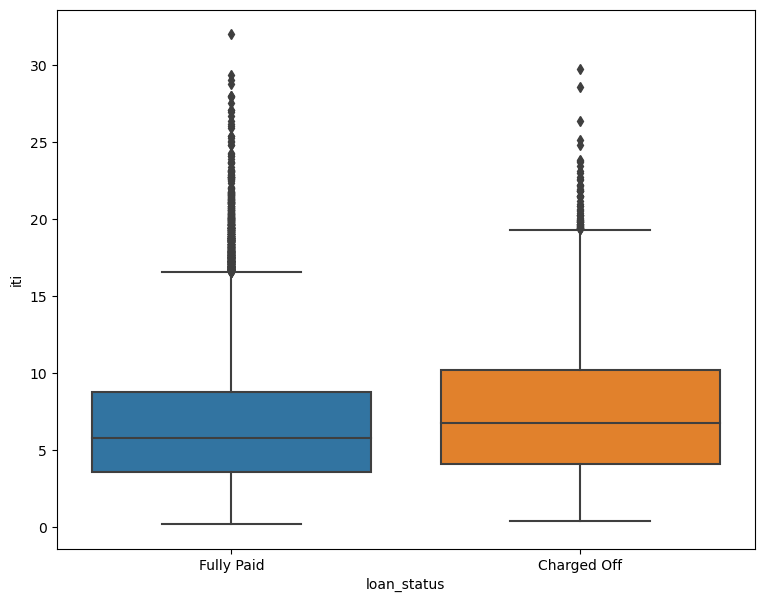

In [331]:
plt.figure(figsize=[9,7])
sns.boxplot(df['loan_status'],df['iti'])
plt.show()

### 2.5 Loan_Status vs delinq_2yrs

In [323]:
ddf=df[df['delinq_2yrs']>0]

In [324]:
ddf.groupby(['loan_status','delinq_2yrs']).size()

loan_status  delinq_2yrs
Charged Off  1               491
             2               118
             3                35
             4                13
             5                 2
             6                 1
             7                 1
             8                 1
Fully Paid   1              2558
             2               502
             3               167
             4                45
             5                17
             6                 9
             7                 3
             8                 1
             9                 1
             11                1
dtype: int64

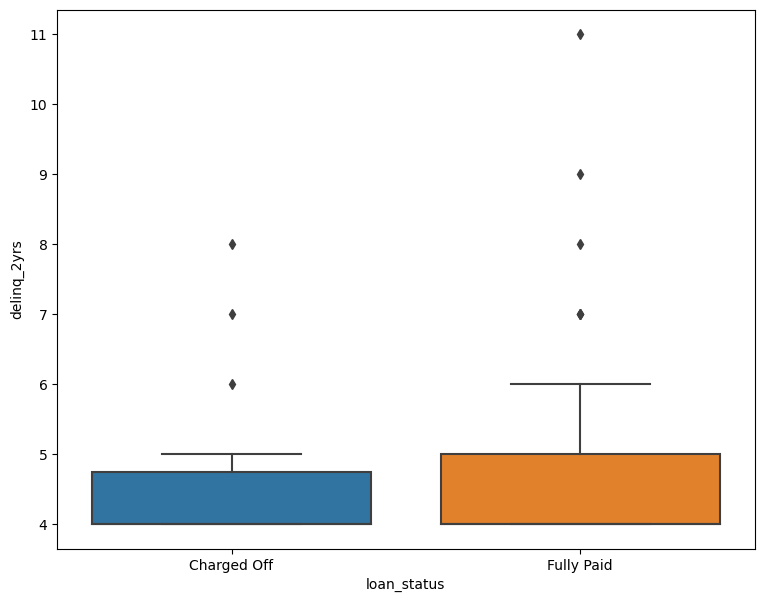

In [320]:
plt.figure(figsize=[9,7])
sns.boxplot(ddf['loan_status'],ddf['delinq_2yrs'])
plt.show()

### 3. Loan_Status vs Purpose
#### Conclusion: The following purpose have more likely to Default by % : 
##### Debt_Consolidation -- 2.5 
##### small_business -- 4.5  
##### other -- 1.2
##### Education 0.17

In [325]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [332]:
round((df.groupby(['purpose','loan_status']).size()/df.groupby(['loan_status']).size())*100, 2)

purpose             loan_status
car                 Charged Off     2.93
                    Fully Paid      4.13
credit_card         Charged Off     9.61
                    Fully Paid     13.64
debt_consolidation  Charged Off    49.42
                    Fully Paid     46.82
educational         Charged Off     0.99
                    Fully Paid      0.83
home_improvement    Charged Off     5.93
                    Fully Paid      7.21
house               Charged Off     1.01
                    Fully Paid      0.90
major_purchase      Charged Off     4.00
                    Fully Paid      5.85
medical             Charged Off     1.91
                    Fully Paid      1.71
moving              Charged Off     1.66
                    Fully Paid      1.47
other               Charged Off    11.18
                    Fully Paid      9.89
renewable_energy    Charged Off     0.33
                    Fully Paid      0.25
small_business      Charged Off     8.36
                    Fully

### 4. Loan_status vs Addr_state 
#### CA and NV have more chance of Default

In [341]:
#round((df[df['loan_status']=='Charged Off'].groupby(['addr_state']).size()/df.groupby(['loan_status']).size())*100, 2)

round((df.groupby(['addr_state','loan_status']).size()/df.groupby(['loan_status']).size())*100, 2)

addr_state  loan_status
AK          Charged Off     0.24
            Fully Paid      0.18
AL          Charged Off     0.96
            Fully Paid      1.18
AR          Charged Off     0.48
            Fully Paid      0.65
AZ          Charged Off     2.15
            Fully Paid      2.23
CA          Charged Off    19.83
            Fully Paid     17.57
CO          Charged Off     1.77
            Fully Paid      2.06
CT          Charged Off     1.69
            Fully Paid      1.87
DC          Charged Off     0.24
            Fully Paid      0.59
DE          Charged Off     0.22
            Fully Paid      0.31
FL          Charged Off     8.97
            Fully Paid      6.95
GA          Charged Off     3.87
            Fully Paid      3.47
HI          Charged Off     0.52
            Fully Paid      0.42
IA          Fully Paid      0.02
ID          Charged Off     0.02
            Fully Paid      0.02
IL          Charged Off     3.55
            Fully Paid      3.87
IN          Fully P

### Loan Status vs Revol_Util 

In [347]:
df.groupby(['loan_status']).mean()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,iti
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,11832.411158,11504.851777,10638.009687,46.212484,328.484191,56650.282105,14.102541,0.168477,1.056711,36.264463,9.105690,0.086356,12769.276745,21.136991,0.0,0.0,6657.161543,6197.951604,3879.993660,2128.041293,4.146427,644.980125,82.537606,320.878566,0.068635,7.515599
Fully Paid,10512.031638,10279.210476,9791.466499,41.098834,309.836344,62013.959320,13.322512,0.141178,0.831071,35.922507,9.186962,0.051552,12300.094246,21.765278,0.0,0.0,12305.973091,11711.334785,10279.205263,2025.915639,0.852290,0.000000,0.000000,3035.080975,0.040437,6.581356


In [343]:

plt.figure(figsize=[9,7])
sns.boxplot(df['loan_status'],df['revol_util'])
plt.show()

KeyError: 'revol_util'

In [355]:
df.groupby(['loan_status']).size()

loan_status
Charged Off     5431
Fully Paid     31386
dtype: int64

## Bivariant Analysis

In [370]:
bdf=df[(df['loan_amnt']> 20000) & (df['annual_inc']> 40000) & (df['annual_inc']<75000) & (df['purpose']=='small_business')]

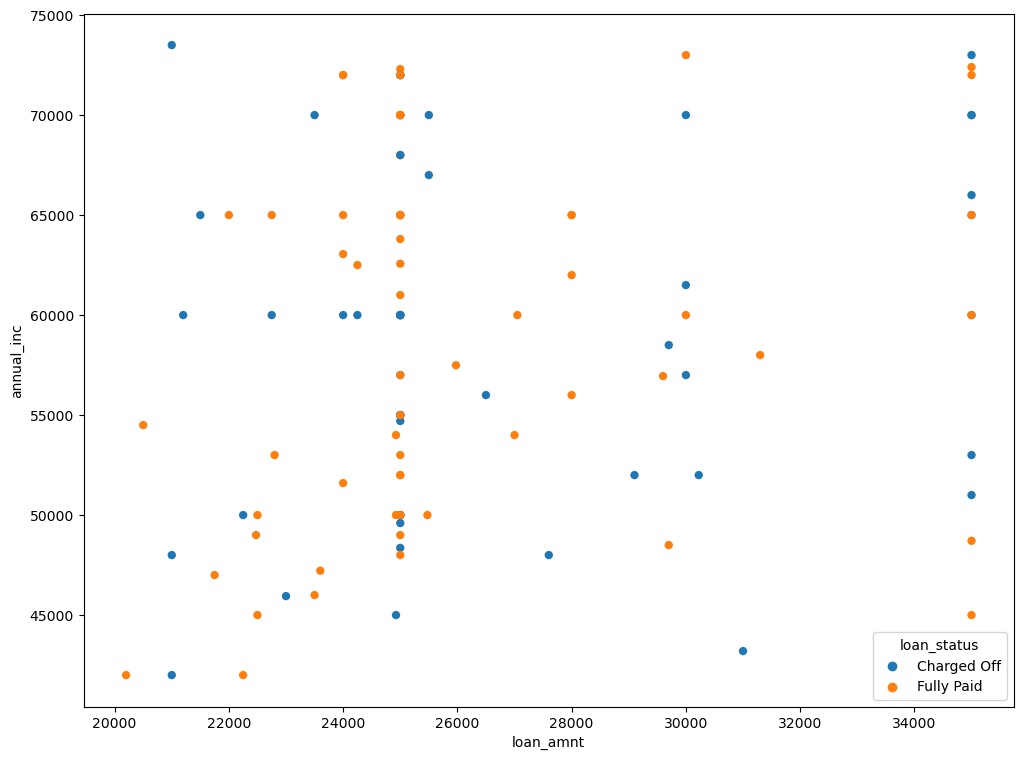

In [372]:
bdf=df[(df['loan_amnt']> 20000) & (df['annual_inc']> 40000) & (df['annual_inc']<75000) & (df['purpose']=='small_business')]
plt.figure(figsize=[12,9])
sns.scatterplot(x='loan_amnt', y='annual_inc', data=bdf, hue='loan_status', ec=None)
plt.show()

In [359]:

def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(bdf.loc[bdf[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(bdf[col_name], order=sorted(bdf[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=bdf, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = bdf.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde Kernel Distribution plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(bdf, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(bdf[col_name].min(), bdf[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=bdf, order=sorted(bdf[col_name].unique()) )
     
    plt.tight_layout()


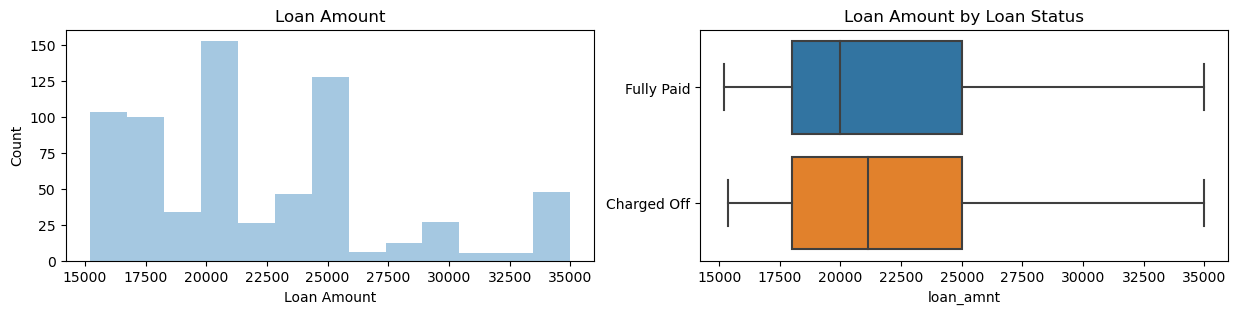

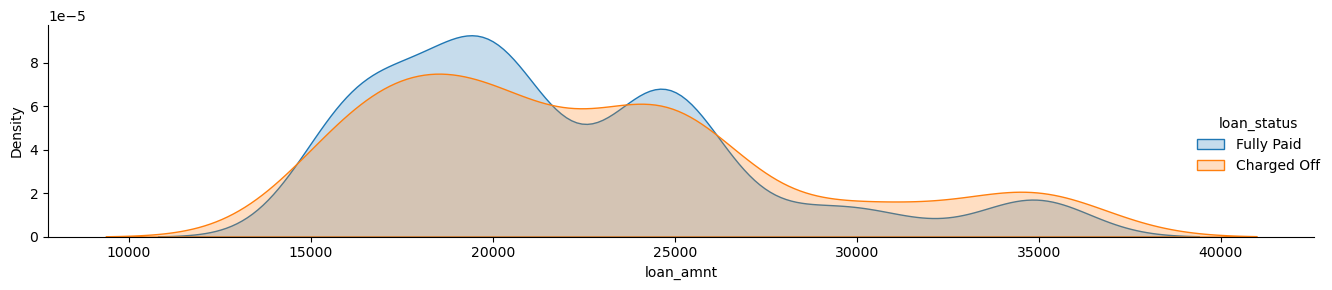

In [360]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

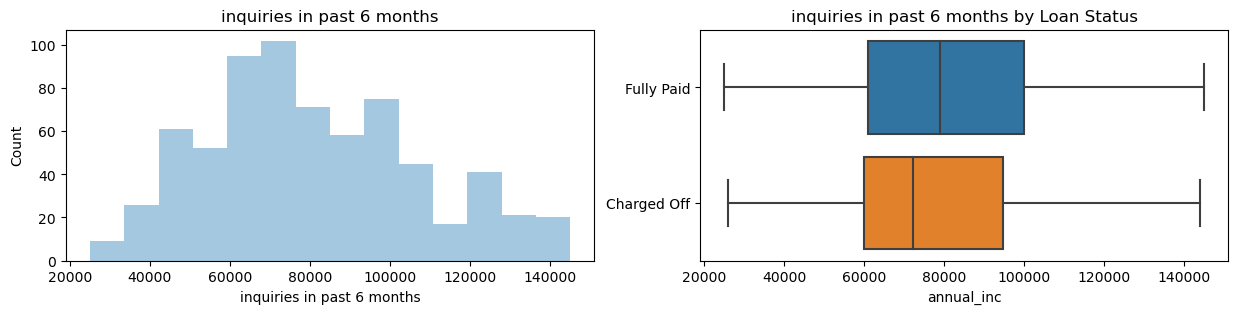

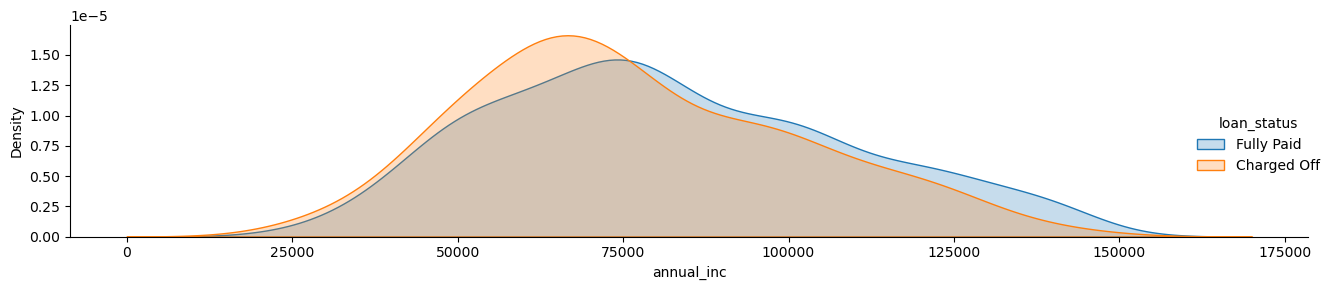

In [366]:
plot_var('annual_inc', 'inquiries in past 6 months', continuous=True)